## LOGISTIC MODEL

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, plot_confusion_matrix, \
        plot_precision_recall_curve, plot_det_curve, \
        plot_roc_curve, classification_report, roc_auc_score, \
        roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

import pandas as pd
from pathlib import Path
import seaborn as sns
sns.set()

DATA_DIR = Path("../DATASETS/covid-tweet/")

In [2]:
train = pd.read_csv(DATA_DIR/"train_procesed.csv")
test = pd.read_csv(DATA_DIR/"test_processed.csv")

test.dropna(inplace=True)


In [3]:
vec = TfidfVectorizer(ngram_range=(1,2),
                      min_df=3, 
                      max_df=0.9, 
                      strip_accents='unicode', 
                      use_idf=1,
                      smooth_idf=1, 
                      sublinear_tf=1)



In [4]:
print(vec.get_params())

{'analyzer': 'word', 'binary': False, 'decode_error': 'strict', 'dtype': <class 'numpy.float64'>, 'encoding': 'utf-8', 'input': 'content', 'lowercase': True, 'max_df': 0.9, 'max_features': None, 'min_df': 3, 'ngram_range': (1, 2), 'norm': 'l2', 'preprocessor': None, 'smooth_idf': 1, 'stop_words': None, 'strip_accents': 'unicode', 'sublinear_tf': 1, 'token_pattern': '(?u)\\b\\w\\w+\\b', 'tokenizer': None, 'use_idf': 1, 'vocabulary': None}


In [5]:
encoder = LabelEncoder()
encoder.fit(train['Sentiment'])

LabelEncoder()

In [6]:
X_train = vec.fit_transform(train.ModifiedTweets)
Y_train = encoder.transform(train['Sentiment'])
X_test = vec.transform(test.ModifiedTweets)
Y_test = encoder.transform(test['Sentiment'])

In [7]:
model = LogisticRegression(C=4, dual=True, solver='liblinear', random_state=42, multi_class='ovr')

In [8]:
model.fit(X_train, Y_train)

LogisticRegression(C=4, dual=True, multi_class='ovr', random_state=42,
                   solver='liblinear')

In [10]:
predicts = model.predict(X_test)

In [41]:
print(classification_report(Y_test, predicts, digits=3, target_names=encoder.classes_))

              precision    recall  f1-score   support

    negative      0.793     0.810     0.801      1633
      normal      0.689     0.529     0.599       616
    positive      0.776     0.831     0.802      1546

    accuracy                          0.773      3795
   macro avg      0.753     0.723     0.734      3795
weighted avg      0.769     0.773     0.769      3795



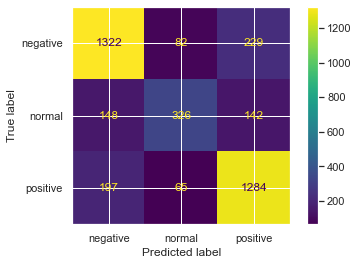

In [42]:
plot_confusion_matrix(model, X_test, Y_test, cmap = 'viridis', display_labels=encoder.classes_);